In [5]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

tf.config.set_visible_devices([], 'GPU')

data = pd.read_csv('train.csv')

In [7]:
from keras.utils.np_utils import to_categorical

x_train = (data.iloc[:,1:].values).astype('float32')
y_train = data.iloc[:,0].values.astype('int32')

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
y_train= to_categorical(y_train)

print(x_train.shape)
print(y_train.shape[1])

(42000, 28, 28, 1)
10


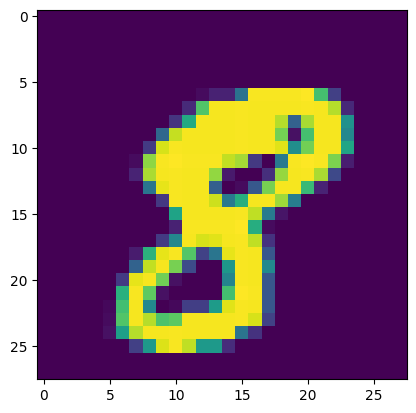

In [5]:
import matplotlib.pyplot as plt 


plt.imshow(x_train[10][:,:,0])

In [21]:
from keras import layers
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers import MaxPooling2D
from keras.layers.convolutional import Conv2D

def CNN():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    return model

model = CNN()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [22]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2)

seed = 42

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.1, random_state=seed)
datagen.fit(x_train)

In [23]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(x_train, y_train,
         batch_size=8, subset='validation'),
         batch_size=86, epochs=24, verbose=1)

Epoch 1/24


2023-04-26 02:20:07.587382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


761/766 [============================>.] - ETA: 0s - loss: 0.4038 - accuracy: 0.8706

2023-04-26 02:20:14.104806: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


766/766 [==============================] - 7s 9ms/step - loss: 0.4028 - accuracy: 0.8711 - val_loss: 0.1100 - val_accuracy: 0.9668
Epoch 2/24
766/766 [==============================] - 7s 9ms/step - loss: 0.1389 - accuracy: 0.9587 - val_loss: 0.0970 - val_accuracy: 0.9708
Epoch 3/24
766/766 [==============================] - 7s 9ms/step - loss: 0.1025 - accuracy: 0.9700 - val_loss: 0.0657 - val_accuracy: 0.9801
Epoch 4/24
766/766 [==============================] - 7s 9ms/step - loss: 0.0959 - accuracy: 0.9716 - val_loss: 0.0509 - val_accuracy: 0.9838
Epoch 5/24
766/766 [==============================] - 7s 9ms/step - loss: 0.0871 - accuracy: 0.9746 - val_loss: 0.0456 - val_accuracy: 0.9846
Epoch 6/24
766/766 [==============================] - 7s 9ms/step - loss: 0.0769 - accuracy: 0.9775 - val_loss: 0.0494 - val_accuracy: 0.9855
Epoch 7/24
766/766 [==============================] - 7s 9ms/step - loss: 0.0745 - accuracy: 0.9782 - val_loss: 0.0450 - val_accuracy: 0.9855
Epoch 8/24
766/76

Text(0.5, 0, 'epoch')

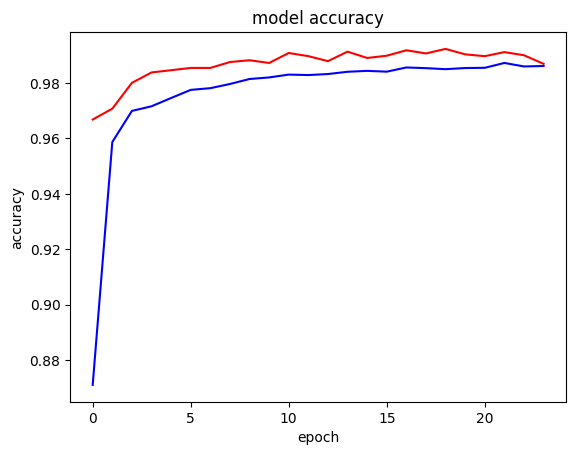

In [24]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

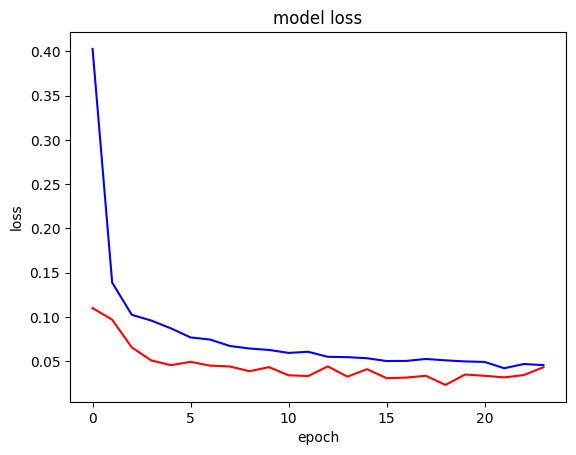

In [25]:
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [26]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

107/107 [==============================] - 0s 3ms/step - loss: 2.4134 - accuracy: 0.9897
Test loss: 2.413445234298706
Test accuracy: 0.9897119402885437


In [27]:
model.save("model")

2023-04-26 02:23:45.509231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,14,14,32]
	 [[{{node inputs}}]]
2023-04-26 02:23:45.516754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,7,7,64]
	 [[{{node inputs}}]]
2023-04-26 02:23:45.523297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256]
	 [[{{node inputs}}]]
2023-04-

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


107/107 [==============================] - 0s 2ms/step


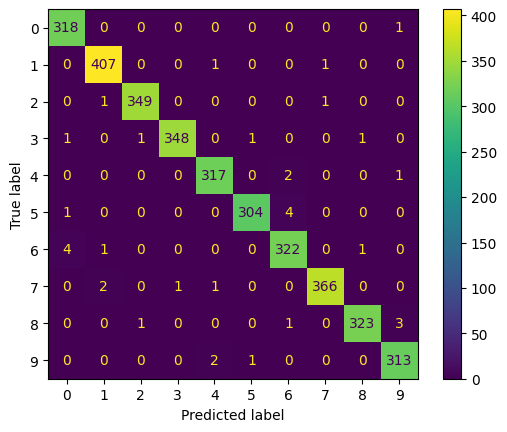

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [2]:
model = keras.models.load_model('model')

1/1 [==============================] - 0s 14ms/step
[0]


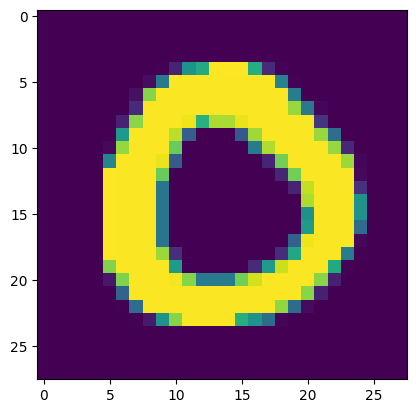

In [12]:
import matplotlib.pyplot as plt 
import numpy as np

indx = 4 
result = model.predict(np.array( [x_train[indx],] ))
plt.imshow(x_train[indx][:,:,0])
print(np.argmax(result, axis=1))